# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
#url = f"https://api.openweathermap.org/data/2.5/weather?q=Phoenix&units=imperial&appid={weather_api_key}"

#response= requests.get(url)
#response.json()


In [26]:
# Set the API base URL
#url = f"https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
#city_data = []

# Print to logger
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters
#record_count = 1
#set_count = 1

# Loop through all the cities in our list to fetch weather data
#for i, city in enumerate(cities[: 5]):
        
    
    # Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 0

    # Create endpoint URL with each city
   #city_url = url + "&q=" + city
    #print(city_url)
    
    #city_weather= requests.get(city_url).json()
    #print(city_weather)
    

In [27]:
#city_date = city_weather['dt']
#city_date

In [13]:
# Set the API base URL BEGINNNIG
url = f"https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | moose jaw
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | rongelap
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | fort bragg
Processing Record 10 of Set 1 | harstad
Processing Record 11 of Set 1 | igarka
Processing Record 12 of Set 1 | selizharovo
Processing Record 13 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | vorozhba
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | magistral'nyy
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | usogorsk
Processing Record 22 of Set 1 | port macqua

In [15]:
({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

{'City': 'ugoofaaru',
 'Lat': 5.6667,
 'Lng': 73,
 'Max Temp': 82.98,
 'Humidity': 72,
 'Cloudiness': 99,
 'Wind Speed': 11.21,
 'Country': 'MV',
 'Date': 1701146518}

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [17]:
# Display sample data
#city_data_df= city_data_df[['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']]
#city_data_df= city_data_df[['City', 'Lat', 'Lng', 'Max Temp']]
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-7.65,98,89,7.78,RU,1701146000
1,hermanus,-34.4187,19.2345,65.86,87,30,7.40,ZA,1701146244
2,moose jaw,50.4001,-105.5344,26.85,80,100,2.30,CA,1701146244
3,thompson,55.7435,-97.8558,-14.64,76,40,2.30,CA,1701146245
4,rongelap,11.1635,166.8941,82.08,76,32,19.42,MH,1701146245


In [18]:
# Export the City_Data into a csv
#city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

city_data_df.to_csv('output_data.csv', index=False)

In [20]:
# Read saved data
file_path= 'output_data.csv'
city_data_df= pd.read_csv(file_path)

#city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-7.65,98,89,7.78,RU,1701146000
1,hermanus,-34.4187,19.2345,65.86,87,30,7.40,ZA,1701146244
2,moose jaw,50.4001,-105.5344,26.85,80,100,2.30,CA,1701146244
3,thompson,55.7435,-97.8558,-14.64,76,40,2.30,CA,1701146245
4,rongelap,11.1635,166.8941,82.08,76,32,19.42,MH,1701146245


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

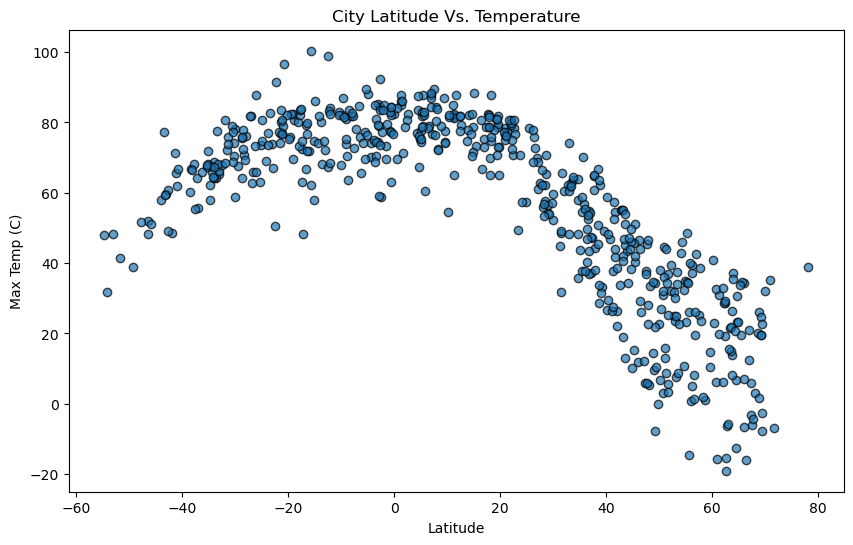

In [38]:
# Build scatter plot for latitude vs. temperature
latitude= city_data_df["Lat"]
temperature= city_data_df["Max Temp"]

#create scatterplot w data
plt.figure(figsize=(10, 6))
plt.scatter(latitude, temperature, alpha=0.7, edgecolors="black")

#add labels
plt.title("City Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

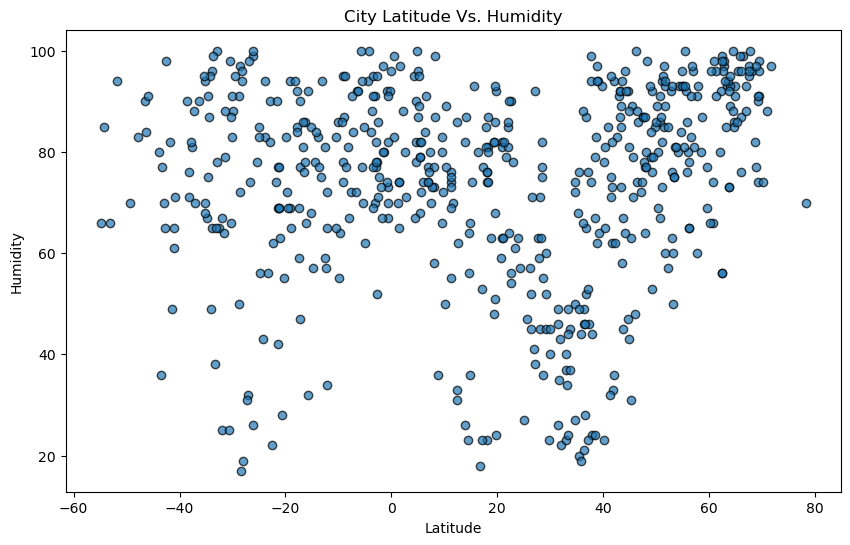

In [39]:
# Build scatter plot for latitude vs. humidity
latitude= city_data_df["Lat"]
humidity= city_data_df["Humidity"]

#create scatterplot w data
plt.figure(figsize=(10, 6))
plt.scatter(latitude, humidity, alpha=0.7, edgecolors="black")

#add labels
plt.title("City Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

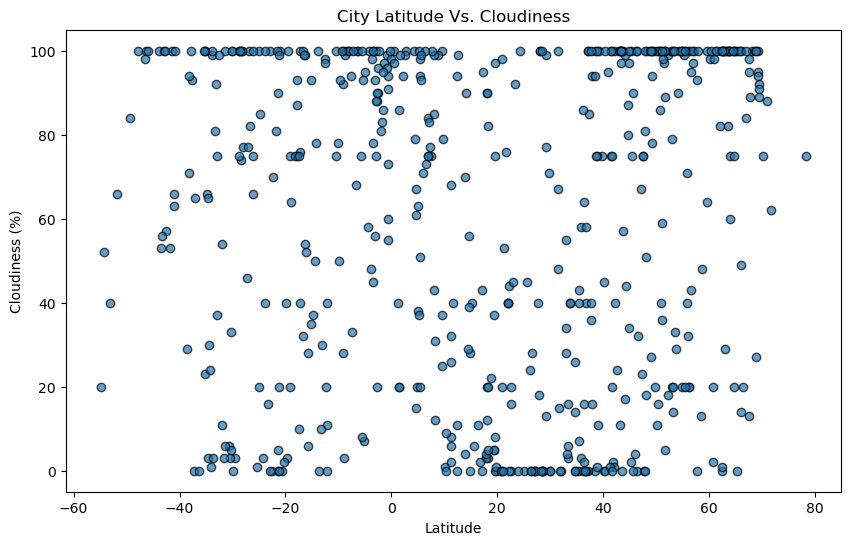

In [40]:
# Build scatter plot for latitude vs. cloudiness
latitude= city_data_df["Lat"]
cloudiness= city_data_df["Cloudiness"]

#create scatterplot w data
plt.figure(figsize=(10, 6))
plt.scatter(latitude, cloudiness, alpha=0.7, edgecolors="black")

#add labels
plt.title("City Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

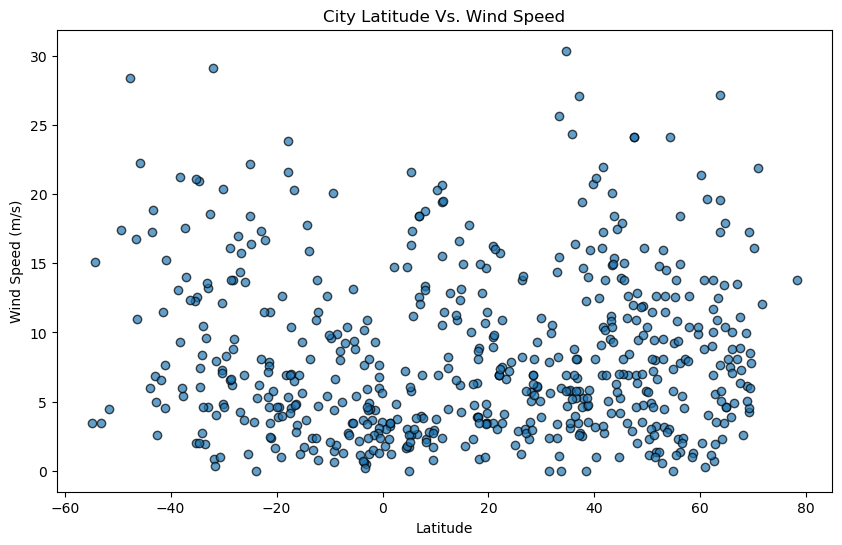

In [41]:
# Build scatter plot for latitude vs. wind speed
latitude= city_data_df["Lat"]
wind_speed= city_data_df["Wind Speed"]

#create scatterplot w data
plt.figure(figsize=(10, 6))
plt.scatter(latitude, wind_speed, alpha=0.7, edgecolors="black")

#add labels
plt.title("City Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
#def linear_regression_plot_scipy(x, y, title='', x_label='', y_label='', save_path=None):
    
    #Perform linear regression
    #slope, intercept, r_value, p_value, std_err = linregress(x, y)    
    
    # Create a scatter plot
    #plt.figure(figsize=(10, 6))
    #plt.scatter(x, y, alpha=0.7, edgecolors='black', linewidth=0.5, label='Scatter Plot')
    
    # Add the regression line
    #regression_line = intercept + slope * x

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-7.65,98,89,7.78,RU,1701146000
2,moose jaw,50.4001,-105.5344,26.85,80,100,2.30,CA,1701146244
3,thompson,55.7435,-97.8558,-14.64,76,40,2.30,CA,1701146245
4,rongelap,11.1635,166.8941,82.08,76,32,19.42,MH,1701146245
5,bethel,41.3712,-73.4140,37.90,71,75,6.91,US,1701146246


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hermanus,-34.4187,19.2345,65.86,87,30,7.40,ZA,1701146244
13,port-aux-francais,-49.3500,70.2167,38.91,70,84,17.38,TF,1701146250
15,adamstown,-25.0660,-130.1015,73.44,85,100,22.17,PN,1701146251
17,puerto ayora,-0.7393,-90.3518,77.56,92,99,5.99,EC,1701146252
18,invercargill,-46.4000,168.3500,52.02,84,100,11.01,NZ,1701146253


###  Temperature vs. Latitude Linear Regression Plot

Correlation Coefficient (r-value): -0.8800


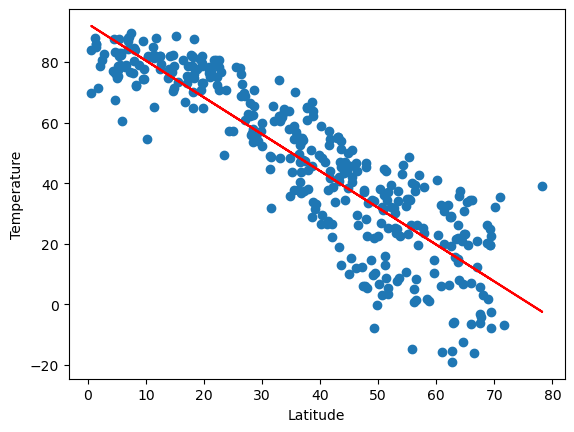

In [85]:
# Build scatter plot for latitude vs. max temp
#a linear regression model 
#extract variables from dataframe
X= northern_hemi_df[["Lat"]]
y= northern_hemi_df["Max Temp"]

model= LinearRegression()
model.fit(X, y)

y_pred= model.predict(X)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(X, y_pred, color="red", label="Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Print the correlation coefficient
print(f'Correlation Coefficient (r-value): {correlation_coefficient:.4f}')

# Show the plot
plt.show()

Correlation Coefficient (r-value): 0.6085


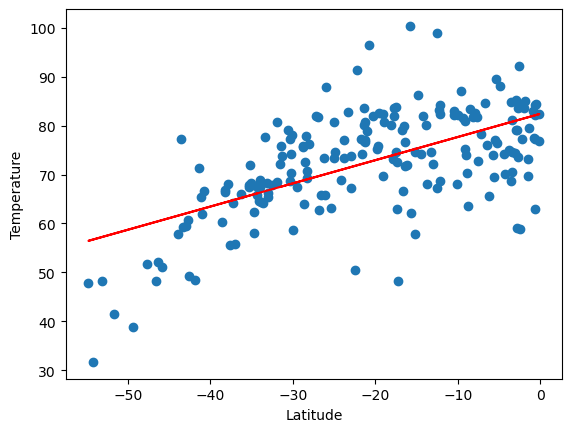

In [90]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. max temp
#extract variables from dataframe
X= southern_hemi_df[["Lat"]]
y= southern_hemi_df["Max Temp"]

model= LinearRegression()
model.fit(X, y)

y_pred= model.predict(X)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(X, y_pred, color="red", label="Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Print the correlation coefficient
print(f'Correlation Coefficient (r-value): {correlation_coefficient:.4f}')

# Show the plot
plt.show()

**Discussion about the linear relationship: 
Northern: a strong, negative linear relationship. This means as distance from the equator increases, the temperature decreases. 

Southern: a positive relationship that is not as strong. as you get closer to the equator, the temperature increases. the increase is more gradual than the Northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

Correlation Coefficient (r-value): 0.2797


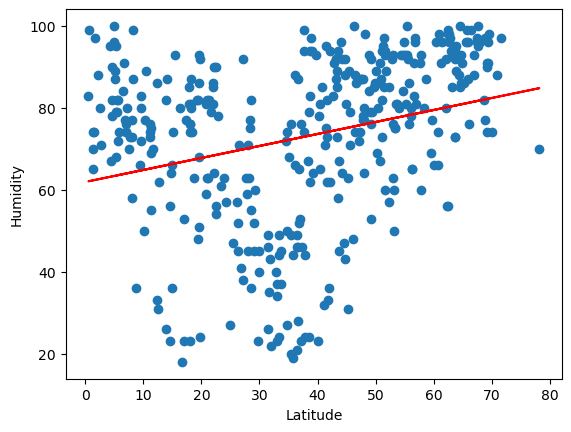

In [87]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. humidity
#extract variables from dataframe
X= northern_hemi_df[["Lat"]]
y= northern_hemi_df["Humidity"]

model= LinearRegression()
model.fit(X, y)

y_pred= model.predict(X)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(X, y_pred, color="red", label="Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Print the correlation coefficient
print(f'Correlation Coefficient (r-value): {correlation_coefficient:.4f}')

# Show the plot
plt.show()

Correlation Coefficient (r-value): 0.1071


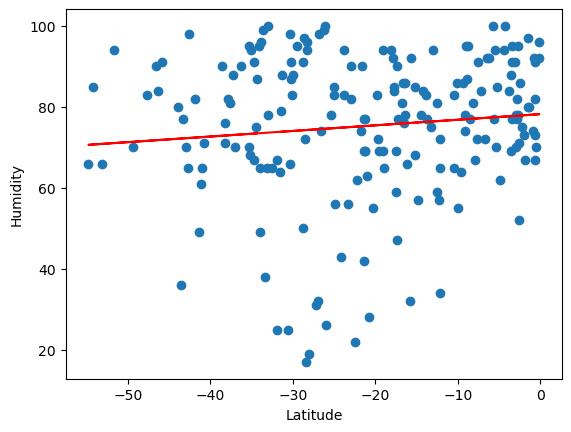

In [91]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. humidity
#extract variables from dataframe
X= southern_hemi_df[["Lat"]]
y= southern_hemi_df["Humidity"]

model= LinearRegression()
model.fit(X, y)

y_pred= model.predict(X)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(X, y_pred, color="red", label="Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Print the correlation coefficient
print(f'Correlation Coefficient (r-value): {correlation_coefficient:.4f}')

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Correlation Coefficient (r-value): 0.2527


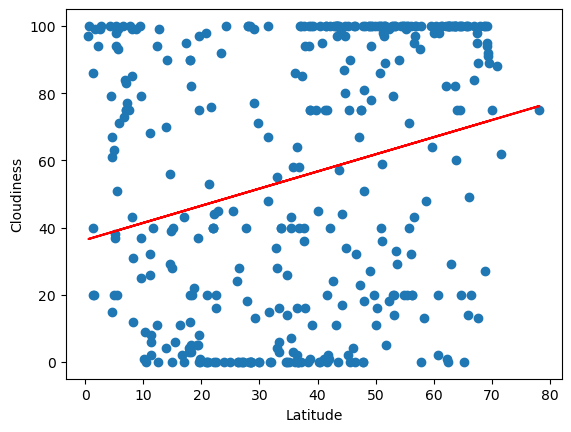

In [88]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. cloudiness
#extract variables from dataframe
X= northern_hemi_df[["Lat"]]
y= northern_hemi_df["Cloudiness"]

model= LinearRegression()
model.fit(X, y)

y_pred= model.predict(X)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(X, y_pred, color="red", label="Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Print the correlation coefficient
print(f'Correlation Coefficient (r-value): {correlation_coefficient:.4f}')

# Show the plot
plt.show()

Correlation Coefficient (r-value): 0.1330


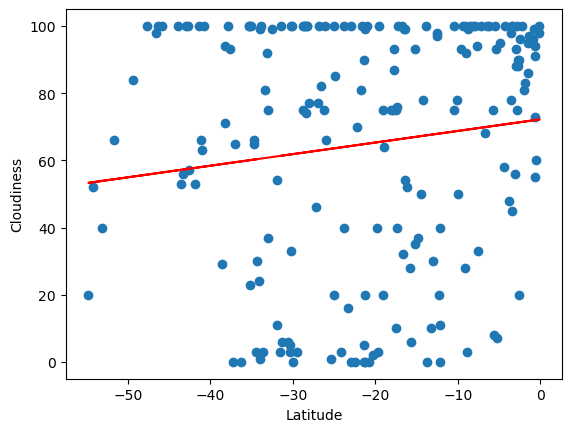

In [92]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. cloudiness
#extract variables from dataframe
X= southern_hemi_df[["Lat"]]
y= southern_hemi_df["Cloudiness"]

model= LinearRegression()
model.fit(X, y)

y_pred= model.predict(X)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(X, y_pred, color="red", label="Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Print the correlation coefficient
print(f'Correlation Coefficient (r-value): {correlation_coefficient:.4f}')

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Correlation Coefficient (r-value): 0.0846


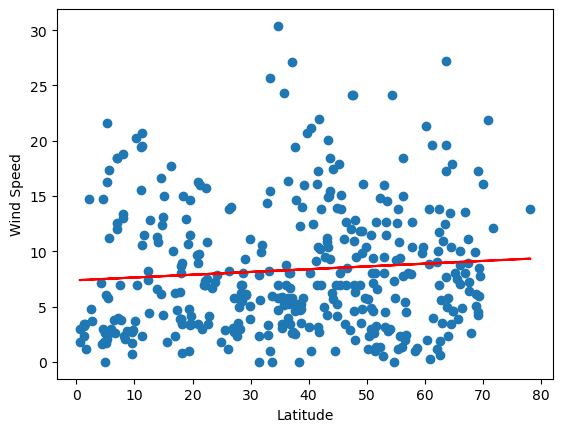

In [89]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. wind speed
#extract variables from dataframe
X= northern_hemi_df[["Lat"]]
y= northern_hemi_df["Wind Speed"]

model= LinearRegression()
model.fit(X, y)

y_pred= model.predict(X)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(X, y_pred, color="red", label="Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Print the correlation coefficient
print(f'Correlation Coefficient (r-value): {correlation_coefficient:.4f}')

# Show the plot
plt.show()

Correlation Coefficient (r-value): -0.3603


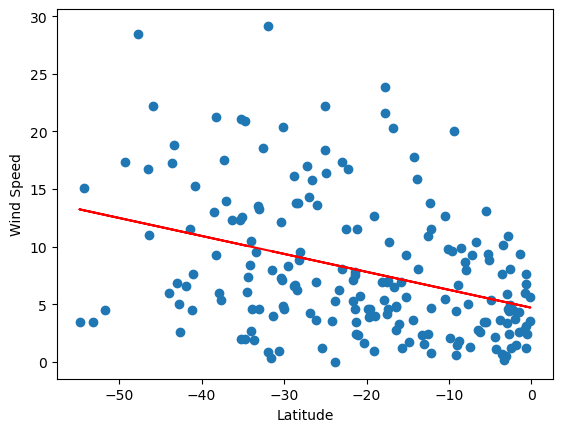

In [93]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. wind speed
#extract variables from dataframe
X= southern_hemi_df[["Lat"]]
y= southern_hemi_df["Wind Speed"]

model= LinearRegression()
model.fit(X, y)

y_pred= model.predict(X)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(X, y_pred, color="red", label="Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Print the correlation coefficient
print(f'Correlation Coefficient (r-value): {correlation_coefficient:.4f}')

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE